 # import library

In [3]:
import os
import cv2
import pydotplus as pydot
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, concatenate,Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import  plot_model


# prepare dataset

In [2]:
path = 'C:/Users/rheza/Documents/Python Scripts/Python Scripts/faces data'
img_height, img_width= 100,100
target_size = (img_height, img_width)
batch_size=32

In [3]:
labels = []
list = os.listdir('C:/Users/rheza/Documents/Python Scripts/Python Scripts/faces data')
for i in list:
    list1 = os.listdir('C:/Users/rheza/Documents/Python Scripts/Python Scripts/faces data/'+i)
    labels.append(i)
print(labels)
classes = len(labels)

['achmada', 'alan', 'aly', 'hafidz', 'panji', 'redi', 'rheza']


In [5]:
def preprocessing_function(image):
    
#     bothEye_cascade = cv2.CascadeClassifier('C:/Users/rheza/Documents/Python Scripts/Python Scripts/HaarCascades/haarcascade_mcs_eyepair_big.xml')
#     # gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)     
#     bothEye = bothEye_cascade.detectMultiScale(image,1.1,5)
                           
#     for(x, y, w, h) in bothEye:
#         cv2.rectangle(image, (x,y-40),(x+w+10,y+h), (255, 0, 0),2)
#         roi_eyes = image[y-40:y+h, x:x+w]
        
#     # image = np.array(image)
#     # # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     # ret, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
#     # print(image.shape)
#     # image = image[:,:,np.newaxis]
#     image = cv2.resize(roi_eyes,(img_height,img_width))
#     image = np.reshape(image, [1,img_height,img_width,3])
    return np.array(hsv_image)

In [4]:
from IPython.display import display
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(validation_split=0.2,)#,brightness_range= [0.7, 1.3],)
                                   # preprocessing_function=preprocessing_function)

train_gen = train_datagen.flow_from_directory(path, target_size = target_size,shuffle = True, class_mode = 'categorical',batch_size = 32,
                                              subset='training',color_mode='rgb')
val_gen = train_datagen.flow_from_directory(path, target_size = target_size,shuffle = True, class_mode = 'categorical',batch_size = 32,
                                            subset='validation',color_mode='rgb')

# batch=next(train_gen)  # returns the next batch of images and labels 
# print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
# img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
# cv2.imwrite(f'1.jpg',img)
                    
# # print (img.shape)
# plt.imshow(img)



Found 553 images belonging to 7 classes.
Found 135 images belonging to 7 classes.


# create model liniear

[array([[[[-0.09292528,  0.10000709,  0.13265342,  0.06998868,
          -0.04729486,  0.11585841, -0.08650284,  0.13437372,
          -0.11721002, -0.11514847,  0.057804  , -0.06773047,
           0.00846648,  0.13516203, -0.14867994, -0.09343449,
           0.00034921, -0.01692747,  0.14098999, -0.06700915,
          -0.01548424, -0.14534944,  0.05259322, -0.09850979,
          -0.0071519 , -0.08565216, -0.12376945,  0.0667782 ,
           0.0546771 , -0.003208  , -0.14680758,  0.09142509,
           0.01985031, -0.1436877 , -0.13640954, -0.07140522,
           0.07054441,  0.10548365,  0.05137771, -0.01531084,
          -0.05204321,  0.12140751, -0.13984828,  0.11271122,
           0.02204382, -0.02707781, -0.14360069,  0.05504493,
           0.01549248, -0.03870894, -0.00038877, -0.10693331,
           0.06477208, -0.1428642 , -0.08926933, -0.11689392,
           0.0086624 ,  0.14160505,  0.10342929, -0.03054219,
          -0.11414801, -0.00202805,  0.02590771,  0.12292331],
      

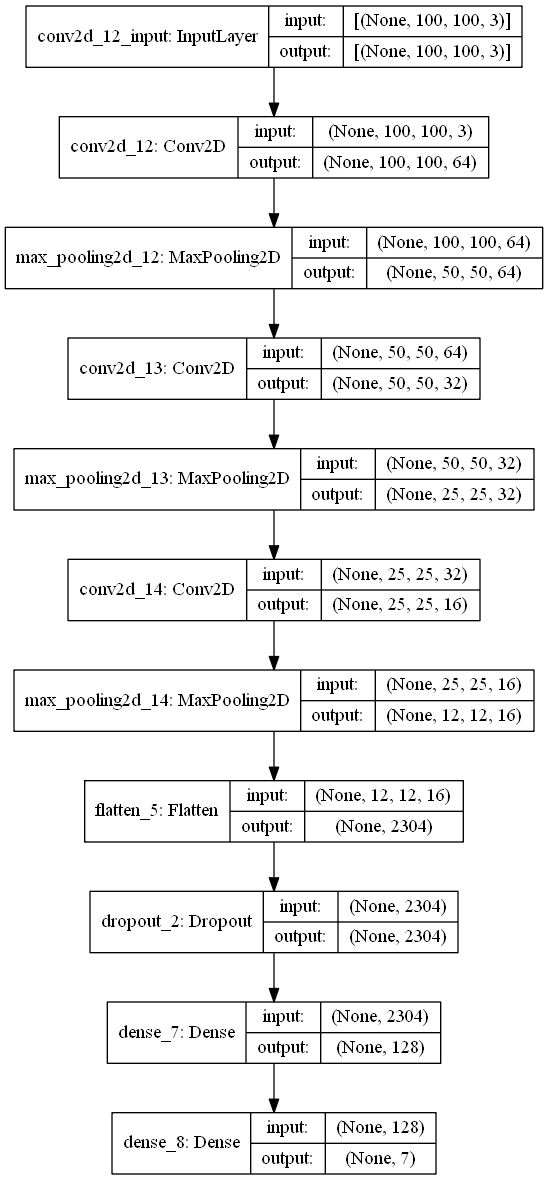

In [10]:
model = Sequential()
model.add(Conv2D(64, kernel_size = 2
                 ,strides = 1, activation='relu',padding = 'same', input_shape = (img_height,img_width,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(Conv2D(32, kernel_size = 2, strides = 1, activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(Conv2D(16, kernel_size = 2, strides = 1, activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))


model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

model.compile(optimizer='Adam',loss = 'categorical_crossentropy', metrics=(['accuracy']))

# model.layers[0].set_weights()
# print(model.layers[0].get_weights()[0].shape)
print(model.layers[0].get_weights())

model.summary()

plot_model(model,show_shapes=True,)

# create model non linear

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 100, 100, 64) 832         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 100, 100, 64) 832         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 50, 50, 64)   0           conv2d_4[0][0]                   
____________________________________________________________________________________________

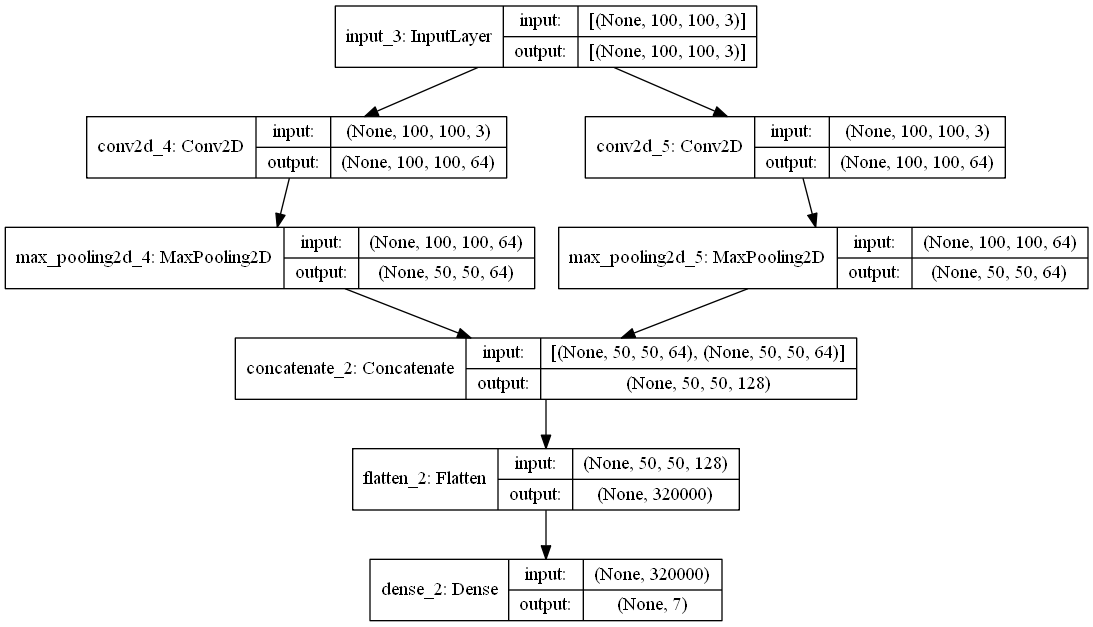

In [7]:
input_awal = Input(shape=[img_height, img_width,3])


left_branch = Conv2D(64, kernel_size = (2,2),strides = (1,1), activation='relu',padding = 'same')(input_awal)
left_branch = MaxPooling2D(pool_size = (2,2))(left_branch)


right_branch = Conv2D(64, kernel_size = (2,2),strides = (1,1), activation='relu',padding = 'same')(input_awal)
right_branch = MaxPooling2D(pool_size = (2,2))(right_branch)

# print(right_branch)
# mylist = np.array(right_branch)
# print(type(mylist))

merged = concatenate([left_branch,right_branch])
merged = Flatten()(merged)

# output_layer = Dense(128, activation='sigmoid')(merged)
output_layer = Dense(classes, activation='sigmoid')(merged)

merged_model = Model(input_awal, output_layer)

merged_model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
merged_model.summary()
plot_model(merged_model,show_shapes=True,)


# train model

In [ ]:
model.fit(train_gen, validation_data = val_gen, epochs = 15)
# weights = model.get_weights()
# print(model.layers[0].get_weights())

In [9]:
merged_model.fit(train_gen, validation_data = val_gen, epochs = 5)

Epoch 1/5
18/18 [==============================] - 7s 401ms/step - loss: 2.8024e-09 - accuracy: 1.0000 - val_loss: 4.3211 - val_accuracy: 0.9407
Epoch 2/5
18/18 [==============================] - 10s 545ms/step - loss: 2.5868e-09 - accuracy: 1.0000 - val_loss: 4.3211 - val_accuracy: 0.9407
Epoch 3/5
18/18 [==============================] - 8s 430ms/step - loss: 2.5868e-09 - accuracy: 1.0000 - val_loss: 4.3211 - val_accuracy: 0.9407
Epoch 4/5
18/18 [==============================] - 10s 561ms/step - loss: 2.5868e-09 - accuracy: 1.0000 - val_loss: 4.3211 - val_accuracy: 0.9407
Epoch 5/5
18/18 [==============================] - 9s 515ms/step - loss: 2.3713e-09 - accuracy: 1.0000 - val_loss: 4.3211 - val_accuracy: 0.9407


# save weight

In [17]:
# save weight dengan 
model_json = model.to_json()
with open ("model.json","w") as file:
    file.write(model_json)
model.save_weights('model.h5')
print()
print('model is saved')


model is saved


# load weight

In [18]:
from tensorflow.keras.models import model_from_json
json_file= open('model.json','r')
loadded_model_json = json_file.read()


load_model = model_from_json(loadded_model_json)
load_model.load_weights('model.h5')
# print(load_model.get_weight)

json_file.close()
print('model is load')
# print(model.layers[0].get_weights())

model is load


# predict 

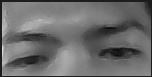

fotonya achmada prediksinya achmada, dengan nilai 0.9925674200057983


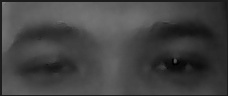

fotonya alan prediksinya alan, dengan nilai 0.9925036430358887


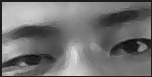

fotonya aly prediksinya aly, dengan nilai 0.9955588579177856


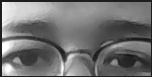

fotonya hafidz prediksinya hafidz, dengan nilai 0.9979538917541504


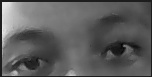

fotonya panji prediksinya panji, dengan nilai 0.9955226182937622


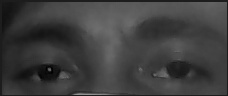

fotonya redi prediksinya redi, dengan nilai 0.9969320297241211


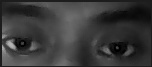

fotonya rheza prediksinya rheza, dengan nilai 0.9953248500823975


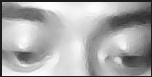

fotonya rheza prediksinya rheza, dengan nilai 0.5556420683860779


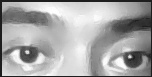

fotonya rheza prediksinya rheza, dengan nilai 0.9260151982307434


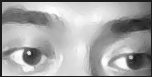

fotonya rheza prediksinya rheza, dengan nilai 0.9471074342727661


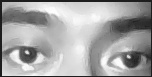

fotonya rheza prediksinya rheza, dengan nilai 0.9461420774459839


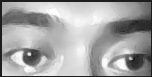

fotonya rheza prediksinya rheza, dengan nilai 0.9357346892356873


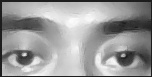

fotonya rheza prediksinya rheza, dengan nilai 0.8728406429290771


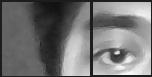

fotonya rheza prediksinya hafidz, dengan nilai 0.922954797744751


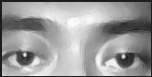

fotonya rheza prediksinya rheza, dengan nilai 0.9061614871025085


In [28]:
import os
import numpy as np
import cv2
from IPython.display import Image as show
from IPython.display import display

list = os.listdir('train_cnn')
for i in list:
    list1 = os.listdir('train_cnn/'+i)
    for j in list1:
        img = 'train_cnn/'+i+'/'+j+''
        image = cv2.imread(img)
        image = cv2.resize(image,(img_height,img_width))
        image = np.reshape(image, [1,img_height,img_width,3])
        prediksi = load_model.predict_classes(image)
        nilai = np.amax(load_model.predict(image))
        display(show(filename=img))
        print(f'fotonya {i} prediksinya {labels[int(prediksi)]}, dengan nilai {nilai}')




# predict with video stream

In [32]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)

bothEye_cascade = cv2.CascadeClassifier('C:/Users/rheza/Documents/Python Scripts/Python Scripts/HaarCascades/haarcascade_mcs_eyepair_big.xml')
while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    bothEye = bothEye_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 3)

    for(x, y, w, h) in bothEye:
        cv2.rectangle(frame, (x,y-40),(x+w, y+h), (255, 0, 0),2)
        roi_eyes = frame[y-40:y+h, x:x+w]
        image = cv2.resize(roi_eyes,(img_height,img_width))
        image = np.reshape(image, [1,img_height,img_width,3])
        
        prediksi = load_model.predict_classes(image)
        nilai = np.amax(load_model.predict(image))
        

        # print(labels[int(prediksi)])
        # print(nilai)
        
        
        cv2.putText(frame, f'{labels[int(prediksi)]}{nilai}', (x, y - 20), cv2.FONT_HERSHEY_COMPLEX, 0.8, [0, 0, 255], 3)
        
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) == ord('q'):
        print("end")
        break

cap.release()
cv2.destroyAllWindows()

end
